### Layman Definition of Time  Series--
    whenever a data is collected over a period of Time, that is basically known as Time Serie

In [2]:
##!pip install sklearn

In [3]:
##!pip install statsmodels

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import mean_squared_error

import matplotlib.pylab as plt


In [5]:
### !pip install sklearn

In [6]:
df=pd.read_csv('bitcoin_price_Training - Training.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [7]:
### In this notebook, we will explore closing price and predict it

In [8]:
df.describe()

,Open,High,Low,Close
count,1556.000000,1556.000000,1556.000000,1556.000000
mean,582.625328,597.992847,567.851446,584.239396
std,523.137312,542.992855,505.877401,525.904442
min,68.500000,74.560000,65.530000,68.430000
25%,254.287500,260.327500,248.835000,254.320000
50%,438.600000,447.560000,430.570000,438.855000
75%,662.437500,674.525000,646.735000,663.402500
max,2953.220000,2999.910000,2840.530000,2958.110000


In [9]:
df.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object

Date is to be in Date-time format inorder to perform a time series analysis but In the current dataset the date is stated as an object which is to be converted in the date time format..

In [10]:
df['Date']=pd.to_datetime(df['Date'])

In [11]:
df.dtypes

Date          datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume                object
Market Cap            object
dtype: object

#### Now sort the dataset from oldest - recent

In [12]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [13]:
df=df.sort_index()

In [14]:
### make your index as Date as In time series , as all activities are going to happen with respect to time

In [15]:
df.set_index('Date',inplace=True)

In [16]:
df.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


## understand your data by performing EDA

In [17]:
data=df.copy()

Text(0, 0.5, 'DAily Bitcoin price')

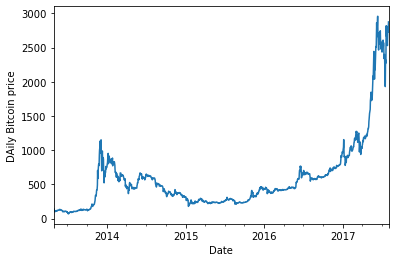

In [18]:
data['Close'].plot()
plt.ylabel("DAily Bitcoin price")

In [19]:
### in this time series model we have to predict the Closing price of Bitcoin

In [20]:
data2 = data['Close']

In [21]:
data2.head()

Date
2017-07-31    2875.34
2017-07-30    2757.18
2017-07-29    2726.45
2017-07-28    2809.01
2017-07-27    2671.78
Name: Close, dtype: float64

In [22]:
data2.tail(10)

Date
2013-05-07    111.50
2013-05-06    112.30
2013-05-05    115.91
2013-05-04    112.50
2013-05-03     97.75
2013-05-02    105.21
2013-05-01    116.99
2013-04-30    139.00
2013-04-29    144.54
2013-04-28    134.21
Name: Close, dtype: float64

In [23]:
### resample your data on weekly basis
data2.resample('W').sum()

Date
2013-04-28      134.21
2013-05-05      831.90
2013-05-12      797.48
2013-05-19      830.97
2013-05-26      894.13
                ...   
2017-07-09    17984.69
2017-07-16    15629.11
2017-07-23    17846.60
2017-07-30    18825.21
2017-08-06     2875.34
Freq: W-SUN, Name: Close, Length: 224, dtype: float64

<AxesSubplot:xlabel='Date'>

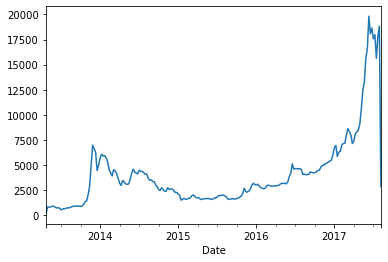

In [24]:
data2.resample('W').sum().plot()

In [25]:
data2.groupby(data2.index.year).mean()

Date
2013     257.474476
2014     527.236658
2015     272.453260
2016     568.492131
2017    1628.622123
Name: Close, dtype: float64

In [26]:
data2.index.dayofweek

Int64Index([0, 6, 5, 4, 3, 2, 1, 0, 6, 5,
            ...
            1, 0, 6, 5, 4, 3, 2, 1, 0, 6],
           dtype='int64', name='Date', length=1556)

In [27]:
### avg daily closing price
weekday=data.groupby(data.index.dayofweek)['Close'].mean()
weekday

Date
0    588.738655
1    582.402658
2    581.731216
3    585.565135
4    583.876622
5    584.545180
6    582.802511
Name: Close, dtype: float64

<AxesSubplot:>

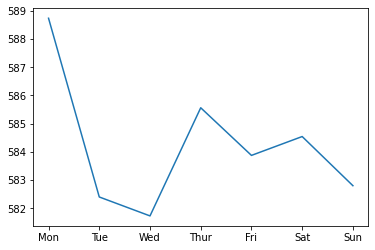

In [28]:
weekday.index = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
weekday.plot()

In [29]:
### Analysing avg closing price by day

In [30]:
data.index.dayofyear

Int64Index([212, 211, 210, 209, 208, 207, 206, 205, 204, 203,
            ...
            127, 126, 125, 124, 123, 122, 121, 120, 119, 118],
           dtype='int64', name='Date', length=1556)

<AxesSubplot:xlabel='Date'>

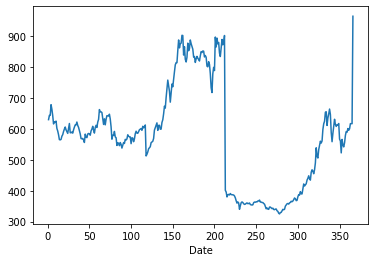

In [31]:
data.groupby(data.index.dayofyear)['Close'].mean().plot()

In [32]:
### Analysing trend of closing price in each & every quarter

In [33]:
data.index.quarter

Int64Index([3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
            ...
            2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
           dtype='int64', name='Date', length=1556)

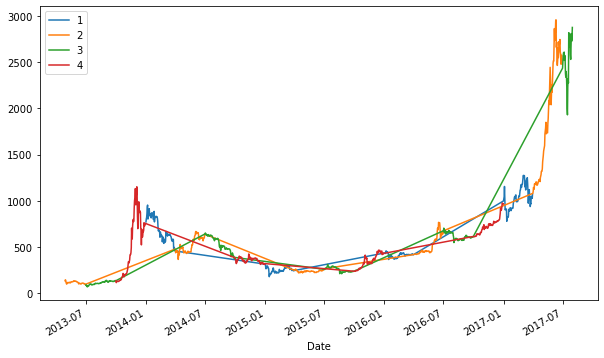

In [34]:
plt.figure(figsize=(10,6))
data.groupby(data.index.quarter)['Close'].plot()
plt.legend()

In [35]:
### analysing trend of clsoing price in weekdays & weekends

In [36]:
data['dayofweek']=data.index.dayofweek

In [37]:
data.head()

,Open,High,Low,Close,Volume,Market Cap,dayofweek
Date,,,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000",0
2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000",6
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000",5
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000",4
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000",3


In [38]:
def assign_labels(feature):
    if feature<5:
        return 'weekdays'
    else:
        return 'weeekends'

In [39]:
data['dayofweek']=data['dayofweek'].apply(assign_labels)

In [40]:
data.head()

,Open,High,Low,Close,Volume,Market Cap,dayofweek
Date,,,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000",weekdays
2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000",weeekends
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000",weeekends
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000",weekdays
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000",weekdays


<AxesSubplot:title={'center':'Weekends'}, xlabel='Date'>

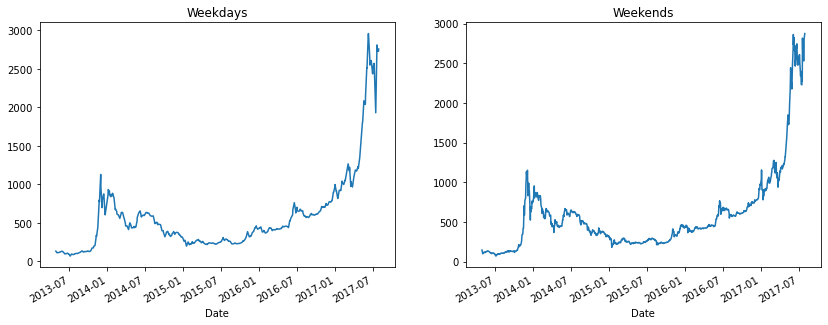

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
data[data['dayofweek']=='weeekends']['Close'].plot(ax=ax[0],title='Weekdays')
data[data['dayofweek']=='weekdays']['Close'].plot(ax=ax[1],title='Weekends')

### Doing Forecasting

### create a baseline model(Naive Model or Initial Model)
    previous value is a best reflector of next value, the recent history is a best refection of the future..
    
    using shift function of Pandas Module , we are able to generate baseline model¶

In [42]:
data['prediction_naive']=data['Close'].shift(1) #put last value to current so first one is Nan due to shifting

<AxesSubplot:xlabel='Date'>

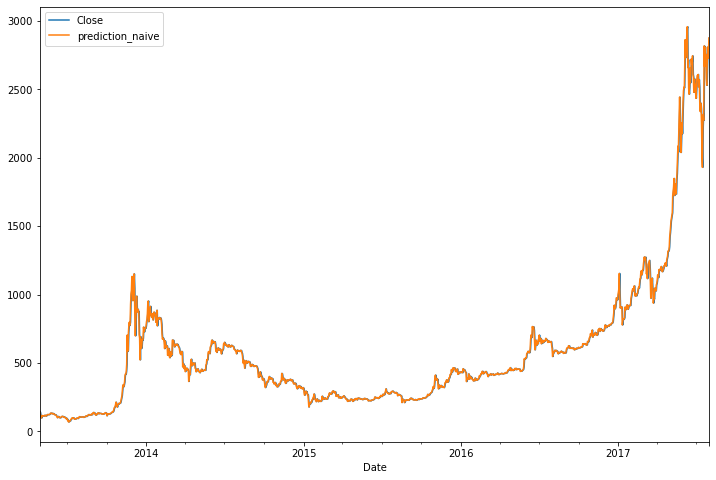

In [43]:
data[['Close','prediction_naive']].plot(figsize=(12,8))

In [44]:
data.head(2)

,Open,High,Low,Close,Volume,Market Cap,dayofweek,prediction_naive
Date,,,,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000",weekdays,NaN
2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000",weeekends,2875.34


In [45]:
### then check accuracy
np.sqrt(mean_squared_error(data['Close'][1:],data['prediction_naive'][1:]))

37.23363264835875

    now we will see still, Baseline performs better  , so can we can stay with Baseline??
    
    Answer is no, bcz in real world it is not necessary that previous data will be true reflector of your future data..
    As my data depends on lots of Factors.

In [46]:
### Examine whether it contains seasonality trend noise or whatever 

<AxesSubplot:xlabel='Date'>

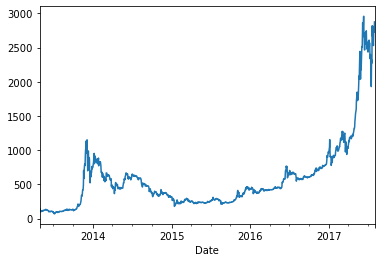

In [47]:
data['Close'].plot()

In [48]:
feature=data['Close']

In [49]:
mean = feature.rolling(window = 7).mean()
std = feature.rolling(window = 7).std()

In [50]:
mean

Date
2017-07-31           NaN
2017-07-30           NaN
2017-07-29           NaN
2017-07-28           NaN
2017-07-27           NaN
                 ...    
2013-05-02    109.820000
2013-05-01    110.308571
2013-04-30    114.237143
2013-04-29    118.842857
2013-04-28    121.457143
Name: Close, Length: 1556, dtype: float64

###  plotting the data

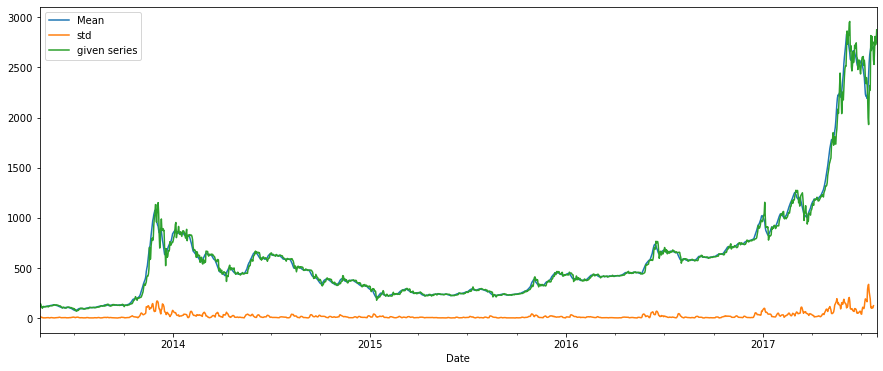

In [51]:
plt.figure(figsize=(15,6))
mean.plot(label='Mean')
std.plot(label='std')
feature.plot(label='given series')
plt.legend()

    The above series show that rolling mean value varies with time and it is not stationary.
    The series needs to be Stationarized so we need to eliminate the trend and seasonality from the series to make it stationary

In [52]:
## !pip install statsmodels

In [53]:
### Testing For Stationarity using statistics approach

from statsmodels.tsa.stattools import adfuller

In [54]:
adfuller(data['Close'].dropna())

(-4.477989431941968,
 0.0002154535155876229,
 24,
 1531,
 {'1%': -3.4346284441307184,
  '5%': -2.863429668579316,
  '10%': -2.5677760318409732},
 14821.38478692329)

In [55]:
### let me make this result more readible & user-friendly 

In [56]:
result=adfuller(data['Close'].dropna())
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
for value,label in zip(result,labels):
    print('{}: {} '.format(label,value))


ADF Test Statistic: -4.477989431941968 
p-value: 0.0002154535155876229 
#Lags Used: 24 
Number of Observations Used: 1531 


In [57]:
## Automate all the stuffs..

def test_for_stationerity(feature):
    mean =feature.rolling(window = 7).mean()
    std =feature.rolling(window = 7).std()
    
    ## plotting the data
    plt.figure(figsize=(15,6))
    mean.plot(label='mean')
    std.plot(label='std')
    feature.plot(label='given series')
    plt.legend()


    result =adfuller(feature)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print('{}: {} '.format(label,value))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

        
        


In [58]:
data.dtypes

Open                float64
High                float64
Low                 float64
Close               float64
Volume               object
Market Cap           object
dayofweek            object
prediction_naive    float64
dtype: object

ADF Test Statistic: -4.477989431941968 
p-value: 0.0002154535155876229 
#Lags Used: 24 
Number of Observations Used: 1531 
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


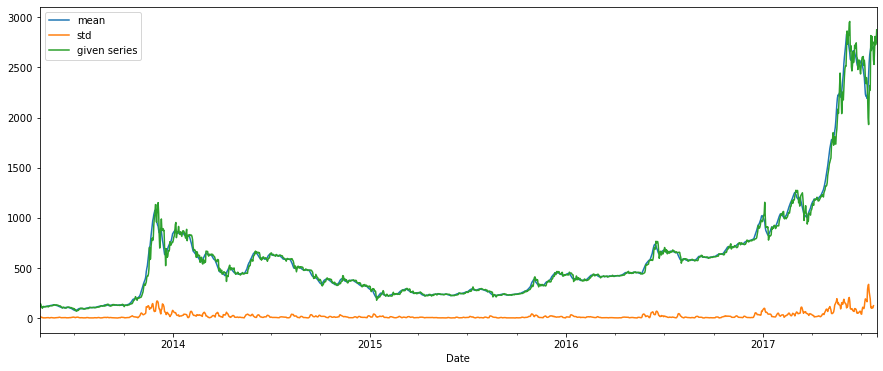

In [59]:
nd=data['Close'].dropna()
test_for_stationerity(nd)

        The above series show that rolling mean value varies with time and is not stationary. 
        The series needs to be Stationarized. we need to eliminate the trend and seasonality from the series to make it stationary
        ie..in a nutshell , This is  non-stationery series data
    

### Transforming the data - (to eliminate trend)

<AxesSubplot:xlabel='Date'>

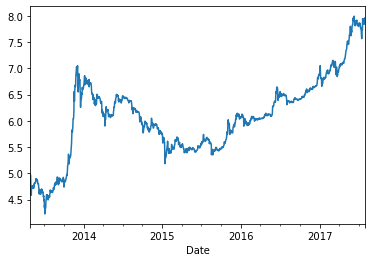

In [60]:
## as we have very high values, apply log transformation on data
log_data=np.log(data['Close']) #smoothing
log_data.plot()

In [61]:
log_data

Date
2017-07-31    7.963926
2017-07-30    7.921964
2017-07-29    7.910756
2017-07-28    7.940587
2017-07-27    7.890500
                ...   
2013-05-02    4.655958
2013-05-01    4.762088
2013-04-30    4.934474
2013-04-29    4.973556
2013-04-28    4.899406
Name: Close, Length: 1556, dtype: float64

In [62]:
Rolling_average=log_data - log_data.shift(7)

In [63]:
Rolling_average

Date
2017-07-31         NaN
2017-07-30         NaN
2017-07-29         NaN
2017-07-28         NaN
2017-07-27         NaN
                ...   
2013-05-02   -0.068505
2013-05-01    0.029669
2013-04-30    0.220449
2013-04-29    0.252382
2013-04-28    0.146592
Name: Close, Length: 1556, dtype: float64

### Smoothening your series to remove Seasonality factor
    smoothing is basically done by Moving Avearge..
    Applications of Moving Average-->> 
    extensively used in Stock Market Analysis as well as in Some business as well
    
    In MA,we use Rolling..
    Rolling is just like a rolling 5 days, rolling 6 days, rolling 7 days
    window  & in business its a window that we have considered for Moving average

In [64]:
import matplotlib.pyplot as plt

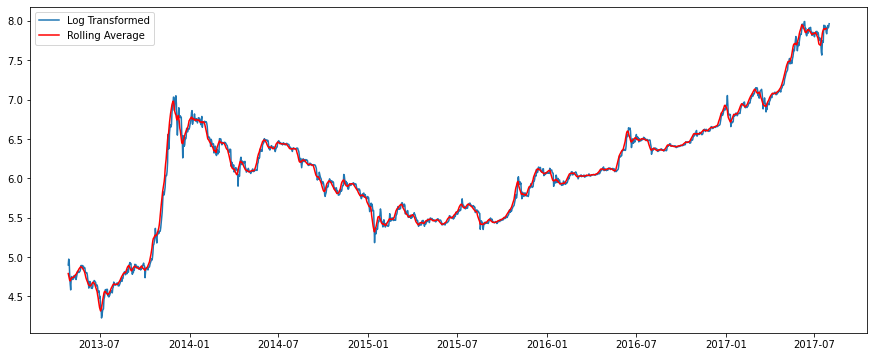

In [65]:
Rolling_average =log_data.rolling(window = 7).mean() # Weighted Moving Average
plt.figure(figsize=(15,6))
plt.plot(log_data, label = 'Log Transformed')
plt.plot(Rolling_average, color = 'red', label = 'Rolling Average')
plt.legend(loc = 'best')

    The red line shows the rolling mean. Note that since we are taking average of last 7 values, rolling mean is not defined for first 7 values. 

    Lets subtract this Rolling average this from the original log transformed series.

In [66]:
lr_diff=log_data-Rolling_average

In [67]:
lr_diff

Date
2017-07-31         NaN
2017-07-30         NaN
2017-07-29         NaN
2017-07-28         NaN
2017-07-27         NaN
                ...   
2013-05-02   -0.041435
2013-05-01    0.060456
2013-04-30    0.201349
2013-04-29    0.204377
2013-04-28    0.109284
Name: Close, Length: 1556, dtype: float64

In [68]:
lr_diff=lr_diff.dropna()

ADF Test Statistic: -7.188887202324532 
p-value: 2.534095558610341e-10 
#Lags Used: 22 
Number of Observations Used: 1527 
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


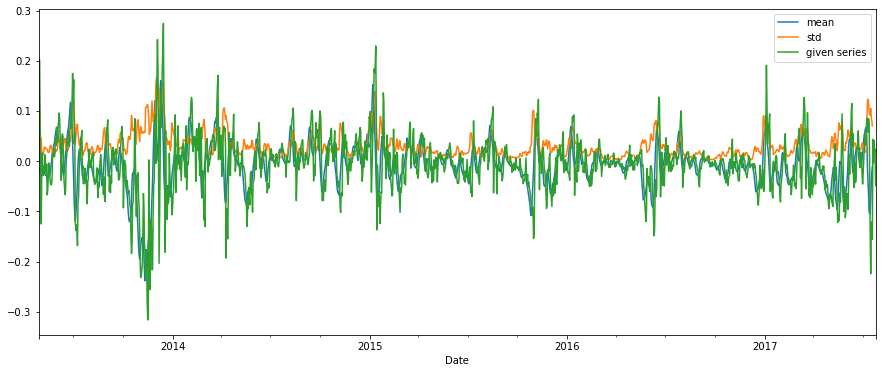

In [69]:
test_for_stationerity(lr_diff)

### Seasonality Adjustment by Differencing

In [70]:
log_ts=log_data-log_data.shift(7)

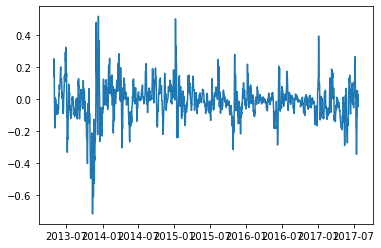

In [71]:
plt.plot(log_ts)

ADF Test Statistic: -6.511722596316715 
p-value: 1.0961860829580395e-08 
#Lags Used: 23 
Number of Observations Used: 1525 
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


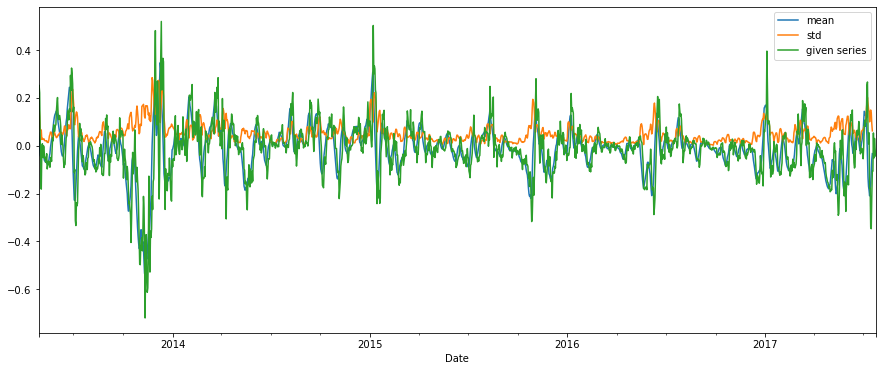

In [72]:
test_for_stationerity(log_ts.dropna())

    The Dickey-Fuller test stats is very much less than 1% critical value than in the previous case. We can say that the Time series is stationary with 99% confidence

### Forecasting Using Prophet

In [73]:
#pip install fbprophet #good for seasoning & noise handling

In [74]:
from fbprophet import Prophet

In [75]:
data.head()

,Open,High,Low,Close,Volume,Market Cap,dayofweek,prediction_naive
Date,,,,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000",weekdays,NaN
2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000",weeekends,2875.34
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000",weeekends,2757.18
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000",weekdays,2726.45
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000",weekdays,2809.01


In [76]:
df=data[['Close']]

In [77]:
df.tail()

,Close
Date,
2013-05-02,105.21
2013-05-01,116.99
2013-04-30,139.00
2013-04-29,144.54
2013-04-28,134.21


In [78]:
df=df.reset_index()

In [79]:
df.columns=['ds','y']

In [80]:
df.head()

,ds,y
0,2017-07-31,2875.34
1,2017-07-30,2757.18
2,2017-07-29,2726.45
3,2017-07-28,2809.01
4,2017-07-27,2671.78


In [81]:

model= Prophet()
model.fit(df)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [82]:
future = model.make_future_dataframe(periods=500, freq='D')
forecast = model.predict(future)

In [83]:
###prediction-basically means for this value, we have this value ie for that day
###whereas forecasting is all about showing some trend ie for a year
### we can predict covid-19 cases using prophet as well

In [84]:
### now do Prediction on future_dates
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-04-28,78.013914,-220.382474,59.110980,78.013914,78.013914,-154.730349,-154.730349,-154.730349,-2.728693,-2.728693,-2.728693,-152.001656,-152.001656,-152.001656,0.0,0.0,0.0,-76.716435
1,2013-04-29,76.042304,-204.743740,66.545849,76.042304,76.042304,-144.214701,-144.214701,-144.214701,1.480335,1.480335,1.480335,-145.695036,-145.695036,-145.695036,0.0,0.0,0.0,-68.172397
2,2013-04-30,74.070694,-203.632095,78.668168,74.070694,74.070694,-136.941412,-136.941412,-136.941412,2.455150,2.455150,2.455150,-139.396562,-139.396562,-139.396562,0.0,0.0,0.0,-62.870719
3,2013-05-01,72.099083,-200.925010,73.228328,72.099083,72.099083,-133.029361,-133.029361,-133.029361,0.053955,0.053955,0.053955,-133.083316,-133.083316,-133.083316,0.0,0.0,0.0,-60.930278
4,2013-05-02,70.127473,-189.398637,83.494906,70.127473,70.127473,-124.550376,-124.550376,-124.550376,2.178101,2.178101,2.178101,-126.728477,-126.728477,-126.728477,0.0,0.0,0.0,-54.422903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2051,2018-12-09,5557.449261,2973.738674,7985.527472,2962.405778,7986.783356,29.400894,29.400894,29.400894,-2.728693,-2.728693,-2.728693,32.129587,32.129587,32.129587,0.0,0.0,0.0,5586.850155
2052,2018-12-10,5563.872450,3041.815590,8021.293592,2961.965758,8000.301908,27.024700,27.024700,27.024700,1.480335,1.480335,1.480335,25.544365,25.544365,25.544365,0.0,0.0,0.0,5590.897150
2053,2018-12-11,5570.295639,2968.985662,8029.439396,2961.525737,8013.820460,21.252516,21.252516,21.252516,2.455150,2.455150,2.455150,18.797366,18.797366,18.797366,0.0,0.0,0.0,5591.548155
2054,2018-12-12,5576.718828,2938.635242,8037.958699,2961.085717,8027.339011,12.030070,12.030070,12.030070,0.053955,0.053955,0.053955,11.976115,11.976115,11.976115,0.0,0.0,0.0,5588.748898


In [85]:

##yhat=(yhat_lower+yhat_upper)/2
##(-223+69)/2

In [86]:
### to show last 5 entries
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2051,2018-12-09,5586.850155,2973.738674,7985.527472
2052,2018-12-10,5590.897150,3041.815590,8021.293592
2053,2018-12-11,5591.548155,2968.985662,8029.439396
2054,2018-12-12,5588.748898,2938.635242,8037.958699
2055,2018-12-13,5590.484927,2990.371902,8059.792155


#### Plotting the Forecasts in fb Prophet

    Prophet has an inbuilt function that enables us to plot the forecasts we just generated. 
    This is achieved using model.plot() and passing in our forecasts as the argument. 
    The blue line in the graph represents the predicted values while the black dots represents the data in our dataset.

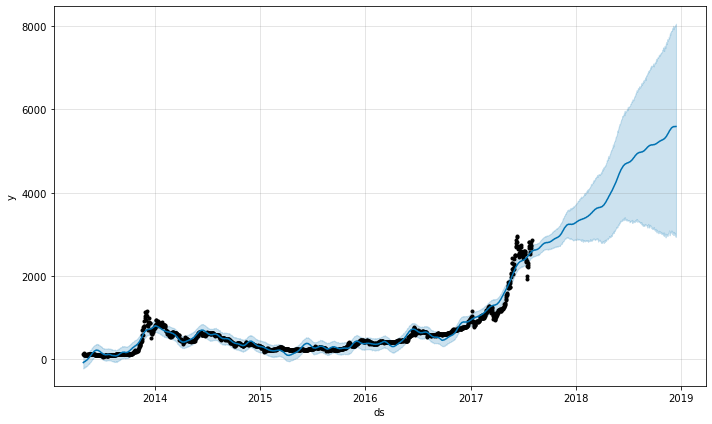

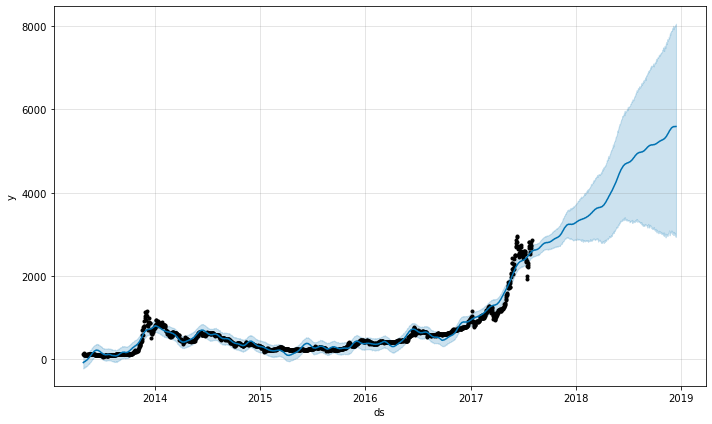

In [87]:
#### plot the predictions u will see these are with respect to yhat
model.plot(forecast)

In [88]:
## The dark blue line in the graph represents the predicted values while the black dots represents the data in our dataset
### whereas light blue lines basically shows some trend

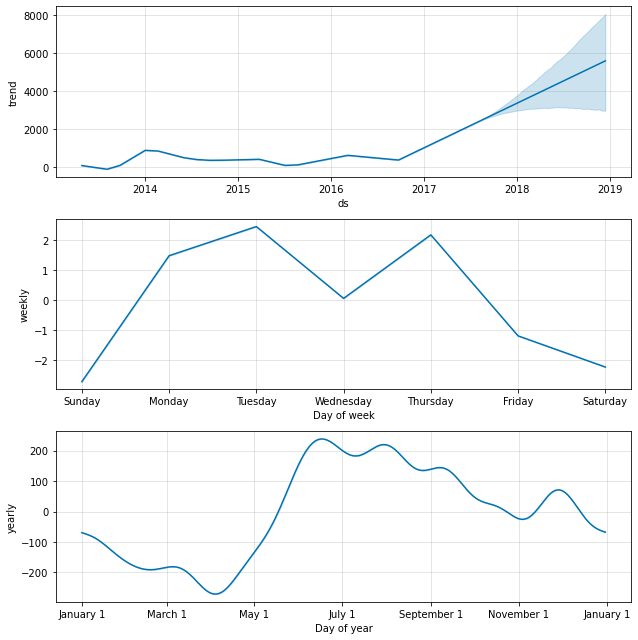

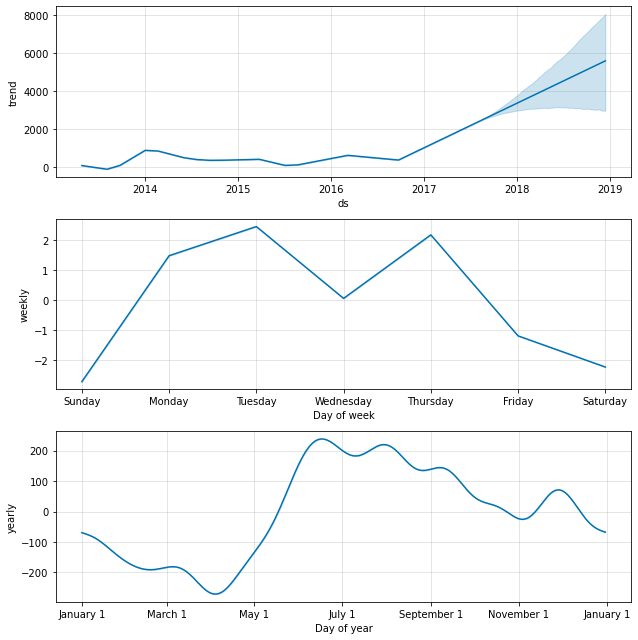

In [89]:
##### Lets Visualize Each Components[Trends,Weekly]
model.plot_components(forecast)

### Cross Validation
    Next let’s measure the forecast error using the historical data. We’ll do this by comparing the predicted values with the actual values. In order to perform this operation we select cut of points in the history of the data and fit the model with data upto that cut off point. After it, we compare the actual values to the predicted values. The cross_validation method allows us to do this in Prophet. This method take the following parameters as explained below: Prophet has in-built cross-validation technique which will hepls us to perform cross validation

    horizon the forecast horizon
    initial the size of the initial training period
    period the spacing between cutoff dates(like first 6 months)

In [90]:
df.shape

(1556, 2)

#### Note: 
    Time-Series Cross Validation is not as same as of Machine Learning(sklearn) Cross validation bcz in Time Series we have to divide data on the basis of time-series

In [91]:
from fbprophet.diagnostics import cross_validation

In [92]:
df_cv=cross_validation(model,horizon="365 days",period='180 days',initial='1095 days')

## horizon='365 days'
## Computes forecasts from historical cutoff points. Beginning from

## value of period=180 from documentation of cross_validation as period=0.5*365=180
## value of initial -3*365 from documentation of cross_validation

INFO:fbprophet:Making 1 forecasts with cutoffs between 2016-07-31 00:00:00 and 2016-07-31 00:00:00


In [93]:
df_cv.shape

(365, 6)

In [94]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2016-08-01,687.246416,606.191206,770.333127,606.27,2016-07-31
1,2016-08-02,688.461819,612.814021,772.523624,547.47,2016-07-31
2,2016-08-03,687.787785,607.773129,767.709610,566.36,2016-07-31
3,2016-08-04,688.579766,605.769434,763.254901,578.29,2016-07-31
4,2016-08-05,688.732000,613.638301,766.131718,575.04,2016-07-31


### how Cross validation applies on Time series data ::--
    Suppose between 1964-1968-is my Total data
    Then Cross validation will be applied like this:--

    then 1964,1965,1966-Train data

    1967,1968,Test Data

    1968,1969-- Validation Data(whatever new dataset I am creating that will be considered as validation data)

    & in this use-case u will see whatever cv I have done is probably for test-dataset which is df_cv
    1962,1965-Train data

    1965,1966,& through Test Data,I have just cross-validate it

    Obtaining the Performance Metrics
    We use the performance_metrics utility to compute the Mean Squared Error(MSE), Root Mean Squared Error(RMSE),Mean Absolute Error(MAE), Mean Absolute Percentage Error(MAPE) and the coverage of the the yhat_lower and yhat_upper estimates.

### plot performance metric

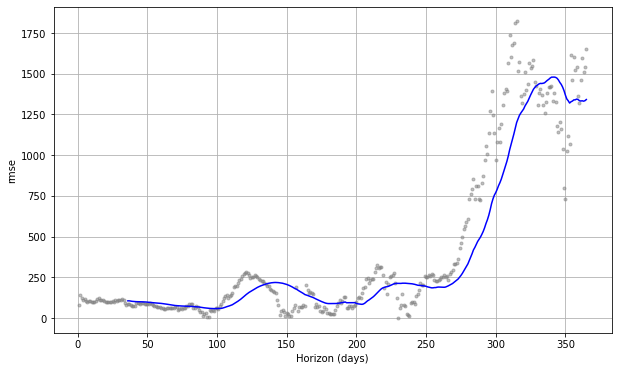

In [95]:
## lets say I have to plot trend of rmse, 

from fbprophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(df_cv,metric='rmse')


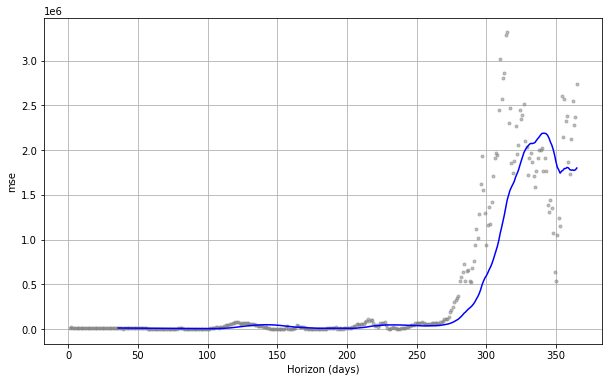

In [96]:
from fbprophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(df_cv,metric='mse')